# Cuaderno 1

In [1]:
#cargar datos desde drive acceso libre
FILEID = "1QWX6nuAteyplMZVKinlpG32j5bUO20sm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-10-21 15:59:40--  https://docs.google.com/uc?export=download&confirm=&id=1QWX6nuAteyplMZVKinlpG32j5bUO20sm
Resolving docs.google.com (docs.google.com)... 108.177.111.100, 108.177.111.113, 108.177.111.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-68-docs.googleusercontent.com/docs/securesc/ajrm8s47lqvnkmk1tdur0l4jvkcr2h37/hgp8b37947loio0mjidscp2vfmnbkvdt/1603295925000/05832326107551052745/15955199981094585113Z/1QWX6nuAteyplMZVKinlpG32j5bUO20sm?e=download [following]
--2020-10-21 15:59:41--  https://doc-14-68-docs.googleusercontent.com/docs/securesc/ajrm8s47lqvnkmk1tdur0l4jvkcr2h37/hgp8b37947loio0mjidscp2vfmnbkvdt/1603295925000/05832326107551052745/15955199981094585113Z/1QWX6nuAteyplMZVKinlpG32j5bUO20sm?e=download
Resolving doc-14-68-docs.googleusercontent.com (doc-14-68-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connectin

In [2]:
#Paso 1: Lectura

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

#1iutaKfUW-oWQLneBKOVWemcwbQn9Jg9N

%matplotlib inline
csv_path = 'cars.csv'
#csv_path = 'specialized.csv'

Xdata = pd.read_csv(csv_path)
#Xdata = pd.read_csv(csv_path)
col_drop = ['is_exchangeable','number_of_photos','up_counter','duration_listed']
Xdata.drop(columns= col_drop, inplace=True)
Xdata.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,location_region,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,Минская обл.,False,True,True,True,False,True,False,True,True,True
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,Минская обл.,False,True,False,False,True,True,False,False,False,True
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,Минская обл.,False,True,False,False,False,False,False,False,True,True
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,Минская обл.,True,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,Гомельская обл.,False,True,False,True,True,False,False,False,False,True


In [3]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  location_region    38531 non-null  object 
 16  feature_0          385

In [4]:
#Paso 2: Particion entrenamiento y validacion
#Tamaño Xtrain 70%, Tamaño Xtest 30%

Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_sal = "price_usd"
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
ytrain = imputer.fit_transform(pd.DataFrame(ytrain))
ytrain = ytrain.reshape(-1)

ytest = imputer.transform(pd.DataFrame(ytest))
ytest = ytest.reshape(-1)

print(ytrain.shape, ytest.shape)

(26971,) (11560,)


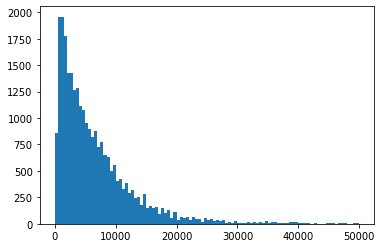

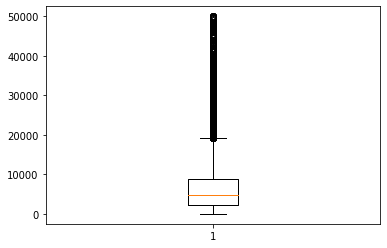

In [6]:
import matplotlib.pyplot as plt
plt.hist(ytrain,bins = 100)
plt.show()

plt.boxplot(ytrain)
plt.show()

In [7]:
col_bool = ['engine_has_gas','has_warranty','feature_0','feature_1','feature_2',
            'feature_3','feature_4','feature_5','feature_6','feature_7',
            'feature_8','feature_9'];

cat = ['manufacturer_name','model_name','transmission','color','engine_fuel',
       'engine_type','body_type','state','drivetrain','location_region']
items = [] 
for i in cat:
    items += [list(Xdata[i].value_counts().index)]
cat_usr = dict(zip(cat, items))

In [8]:
Xdata[cat[9]].value_counts()

Минская обл.        24230
Гомельская обл.      3140
Витебская обл.       3007
Брестская обл.       2991
Могилевская обл.     2678
Гродненская обл.     2485
Name: location_region, dtype: int64

In [9]:
def code_bool(y):
  yc = np.zeros(y.shape[0])

  for i in range(y.shape[0]):
      yc[i] = int(y[i])
  return yc

# Crear clase propia

In [10]:
#%% car transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

class car_ros(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self, col_bool, cat_usr): #constructor clase
        self.col_bool = col_bool #Lista de atributos enteros (1 o 0)
        self.cat_usr = cat_usr #lista de atributos categoricos

    def fit(self,X, *_):
        Xi = X.copy() #copiar dataset para no reemplazar original
        self.imputer_num = SimpleImputer(strategy="most_frequent") #crear imputador tipo modo
        self.a = Xi.columns[np.sum(Xi.isna())> 0] #encontrar columnas con datos faltantes
        #print(a)
        self.imputer_num.fit(Xi[self.a]) # ajustar imputador
        
        Xi[self.a] = self.imputer_num.transform(Xi[self.a]) #evaluar  sobre datos imputador

        for i in self.col_bool: 
            Xi[i] = code_bool(np.array(Xi[i]))     
        
        cat = [] #codificar variables categoricas con ordinal encoder
        for i in self.cat_usr.keys():
            cat = cat + [[*self.cat_usr.get(i)]]
        self.col_cat_usr = OrdinalEncoder(categories=cat) #OneHotEncoder(categories=cat,sparse=False) 
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.fit_transform(Xi[[*self.cat_usr.keys()]])
        
        #self.col_cat = Xi.columns[Xi.dtypes=='O']
        #self.cod = OrdinalEncoder()
        #self.cod.fit(Xi[self.col_cat])
        
        return self    

    def transform(self, X, *_):#funcion transformador-> pensando datos nuevos
        Xi = X.copy()
        Xi[self.a] = self.imputer_num.transform(Xi[self.a])
        
        for i in self.col_bool:
            Xi[i] = code_bool(np.array(Xi[i]))

        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.transform(Xi[[*self.cat_usr.keys()]])
        #Xi[self.col_cat]= self.cod.transform(Xi[self.col_cat])
        return Xi
    
    def fit_transform(self,X,*_):
        self.fit(X)
        return self.transform(X)

In [11]:
car = car_ros(cat_usr=cat_usr,col_bool=col_bool)
Xtrain_pre = car.fit_transform(Xtrain)

In [12]:
Xtest_pre = car.transform(Xtest)

In [13]:
corr_matrix = Xtrain_pre.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,location_region,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
manufacturer_name,1.000000,0.422402,0.100351,0.045776,-0.180471,0.092124,-0.102058,0.045802,-0.192809,0.098020,0.025990,0.037346,0.036616,0.121984,-0.044876,0.002636,0.026979,-0.006149,0.017448,0.088677,0.034767,-0.000032,0.023400,-0.007452,0.021272
model_name,0.422402,1.000000,0.131745,0.011566,-0.163226,0.067003,-0.046134,0.026217,-0.092069,0.220190,0.187752,-0.048493,-0.001370,0.202615,-0.043480,-0.009399,0.019735,0.070156,0.086526,0.146792,0.066783,0.090089,0.097392,0.056839,0.047071
transmission,0.100351,0.131745,1.000000,-0.111831,-0.232330,0.383459,-0.058093,0.017538,-0.135075,0.426400,-0.003588,0.068176,0.009684,0.386523,-0.125622,-0.246801,0.276355,0.369882,0.406766,0.442640,0.439402,0.343379,0.369355,0.402636,0.325913
color,0.045776,0.011566,-0.111831,1.000000,0.027888,-0.151612,-0.056147,0.008926,-0.069117,-0.106693,0.007646,0.033291,0.023280,-0.072102,0.019295,0.138619,-0.143390,-0.106019,-0.114769,-0.115330,-0.119466,-0.108920,-0.107059,-0.144251,-0.121775
odometer_value,-0.180471,-0.163226,-0.232330,0.027888,1.000000,-0.492226,0.214739,0.054416,0.249768,0.106983,0.032433,-0.188939,-0.085390,-0.067134,0.130612,0.104512,-0.149628,-0.075626,-0.230397,-0.069063,-0.240149,-0.171005,-0.258791,-0.207838,-0.089189
year_produced,0.092124,0.067003,0.383459,-0.151612,-0.492226,1.000000,-0.006829,-0.073664,0.017812,0.003318,0.112378,0.209219,0.042387,0.098806,-0.195374,-0.346335,0.424316,0.205086,0.432951,0.185494,0.432167,0.348208,0.462060,0.463865,0.247327
engine_fuel,-0.102058,-0.046134,-0.058093,-0.056147,0.214739,-0.006829,1.000000,0.503359,0.694161,0.110177,0.201029,-0.053082,-0.041951,0.044766,0.063291,-0.013687,0.017151,0.020737,0.031489,0.016906,-0.053815,0.082916,0.032098,0.034790,0.002627
engine_has_gas,0.045802,0.026217,0.017538,0.008926,0.054416,-0.073664,0.503359,1.000000,-0.134443,0.077612,0.019285,-0.020668,-0.010847,0.024668,0.077413,0.003126,-0.005083,-0.007500,-0.027666,0.002903,-0.024077,-0.028943,-0.032363,-0.037462,-0.007509
engine_type,-0.192809,-0.092069,-0.135075,-0.069117,0.249768,0.017812,0.694161,-0.134443,1.000000,0.090219,0.244997,-0.046490,-0.041742,0.047522,0.030829,-0.003392,0.007985,0.021990,0.035597,0.001492,-0.066853,0.099608,0.029662,0.047255,-0.013944
engine_capacity,0.098020,0.220190,0.426400,-0.106693,0.106983,0.003318,0.110177,0.077612,0.090219,1.000000,0.170306,-0.052777,-0.045695,0.555731,-0.012915,-0.137745,0.131405,0.376620,0.243273,0.450391,0.273779,0.285675,0.201181,0.242602,0.244344


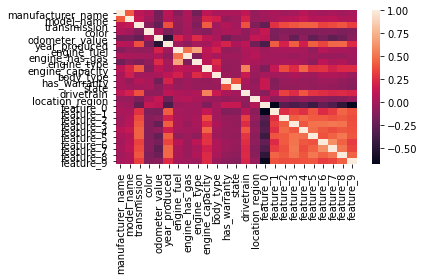

In [14]:
import seaborn as sns
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
#plt.savefig('results/corr_matrix.pdf', format='pdf', dpi=300)
plt.show()

In [15]:
Xtrain_pre2 = Xtrain_pre.copy()
Xtrain_pre2['Salida'] = ytrain
corr_matrix = abs(Xtrain_pre2.corr())
corr_matrix['Salida'].sort_values(ascending=False)

Salida               1.000000
year_produced        0.704423
feature_7            0.499192
transmission         0.473861
feature_3            0.469946
feature_6            0.451733
feature_8            0.447198
feature_5            0.431940
odometer_value       0.424408
drivetrain           0.405044
feature_2            0.336199
feature_4            0.335828
engine_capacity      0.297288
has_warranty         0.290049
feature_9            0.266379
feature_1            0.253540
feature_0            0.223464
body_type            0.198491
location_region      0.181193
model_name           0.155145
color                0.116488
engine_type          0.083458
state                0.083322
engine_has_gas       0.065004
manufacturer_name    0.062773
engine_fuel          0.047147
Name: Salida, dtype: float64

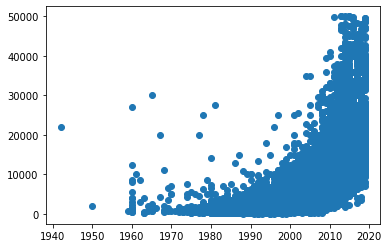

In [16]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain_pre['year_produced'],ytrain)

# Modelo de regresión

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,SGDRegressor

steps = [('preproceso',car_ros(cat_usr = cat_usr,col_bool=col_bool)), 
         ('regresion',LinearRegression())
         ]
metodo_full = Pipeline(steps=steps)
metodo_full

metodo_full.fit(Xtrain,ytrain) #entrena todos los pasos

Pipeline(memory=None,
         steps=[('preproceso',
                 car_ros(cat_usr={'body_type': ['sedan', 'hatchback',
                                                'universal', 'suv', 'minivan',
                                                'minibus', 'van', 'coupe',
                                                'liftback', 'pickup',
                                                'cabriolet', 'limousine'],
                                  'color': ['black', 'silver', 'blue', 'white',
                                            'grey', 'red', 'green', 'other',
                                            'brown', 'violet', 'yellow',
                                            'orange'],
                                  'drivetrain': ['front', 'rear', 'all'],
                                  'engine_fuel': ['gas...
                                  'state': ['owned', 'new', 'emergency'],
                                  'transmission': ['mechanical', 'automatic']},
       

In [18]:
ytest_e = metodo_full.predict(Xtest)
#metodo_full[1].coef_

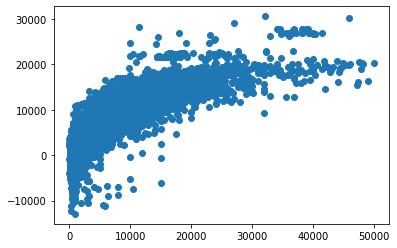

In [19]:
#plt.plot(ytest_num,label='original')
#plt.plot(ytest_e,'r',label='estimado')
plt.scatter(ytest,ytest_e)

#plt.legend()

# 2

In [20]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

sca = StandardScaler()
Xtrain_pre_z = sca.fit_transform(Xtrain_pre)

In [21]:
red = PCA()
zz = red.fit_transform(Xtrain_pre_z)

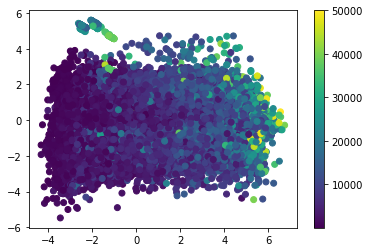

In [22]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain)
plt.colorbar()
plt.show()

In [23]:
Xtest_pre = car.transform(Xtest)

In [24]:
Xtest_pre_z = sca.transform(Xtest_pre) # standardizacion
zztest = red.transform(Xtest_pre_z) # llevarlo a 2D con pca

In [25]:
# definir modelos de predicción
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge

steps = [
       #  [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
       #   ('reg', LinearRegression())],
         
       #  [('scaler',StandardScaler()),
       #   ('reg',ElasticNet())],
         
      #   [('scaler', StandardScaler()),
      #    ('reg', Ridge())],
         
         [('scaler', StandardScaler()),
          ('reg', Lasso())],
         
      #   [('scaler', StandardScaler()),
      #    ('reg', KernelRidge(kernel = 'rbf'))]
         
       #  [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
       #   ('reg', KernelRidge(kernel = 'rbf'))], #clasificador 
         ]        

#parametros a buscar por busqueda por grilla
parameters =[ 
           #  {
           #     'reg__fit_intercept':[True, False]             
           #  },
           #  {
           #     'reg__alpha': [0,1e-3,1e-2,1e-1,1,10], #parametros n_neighbors debe ser siempre un int
           #     'reg__l1_ratio':[0,0.25,0.5,0.75,1]
           #  },
           #  {
           #      'reg__alpha': [0,1e-3,1e-2,1e-1,1,10]
           #  },
              {
                  'reg__fit_intercept':[True, False],
                  'reg__alpha': [0,1e-3,1e-2,1e-1,1,10]
              }
              ]

label_model = ['Nor+Lasso']#'Nor-KernelRide','Nor+RegLin','Nor+ElasticNet']

In [26]:
steps

[[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('reg', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=None,
         selection='cyclic', tol=0.0001, warm_start=False))]]

In [27]:
import os
pathpre = 'datospre'

try:
  os.mkdir(pathpre)
except:
  print("Carpeta results ya existe")

In [28]:
#valildacion cruzada anidada
from joblib import dump, load
from sklearn.metrics import mean_absolute_error as msa 
Niter = 10 #numero particiones outter loop nested cross-validation
msev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto/error
Nmod = len(steps) #numero de modelos a probar
best_estimators = Niter*[None]#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = Niter*[None]#mejor metodo por iteracion 


#############################
for j in range(Niter): #outter loop # SI TIENE MENOS DE 1000 DATOS BORRAR ESTE CICLO SOLO CV EN LINEA 16
      #print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_trainj, X_testj, y_trainj, y_testj = train_test_split(Xtrain_pre,ytrain,test_size=0.3) # xtrain 60, xtest 26
      list_est = [] #lista lazo interno para guardar mejor estimador por modelo para iteracion j
      list_hyper = [] #lista lazo interno para guardar mejores hyperparametros por modelo para iteracion j
      for r in range(Nmod): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r],memory=pathpre), parameters[r],cv=5,verbose=5,scoring='neg_mean_absolute_error',n_jobs=-1) #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          grid_search.fit(X_trainj,y_trainj)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_testj)
          #guardar mejor modelo
          list_est.append(grid_search.best_estimator_)
          list_hyper.append(grid_search.best_params_)
          #guardar acierto
          msev[j,r] = msa(y_testj,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r+1,len(steps)))
          print('best hyper', grid_search.best_params_)
          print('msa:',msev[j,r])
          
      best_estimators[j] = list_est #guardar mejores modelos 
      best_hyperpar[j] = list_hyper #mejores hyperparametros
          
          
      savedata = {
          'acc':msev,
          'best_models':best_estimators,
          'best_parameters':best_hyperpar,
            } 
      dump(savedata,'fifa.joblib')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   13.2s finished


it 1/10-Modelo 1/1
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 2229.1232603873805
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.8s finished


it 2/10-Modelo 1/1
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 2241.271375808984
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.5s finished


it 3/10-Modelo 1/1
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 2213.575316755416
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.6s finished


it 4/10-Modelo 1/1
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 2220.740127425883
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.7s finished


it 5/10-Modelo 1/1
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 2243.721631868361
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10-Modelo 1/1
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 2261.140213113314
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10-Modelo 1/1
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 2211.121375862686
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.7s finished


it 8/10-Modelo 1/1
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 2247.0183805257766
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.7s finished


it 9/10-Modelo 1/1
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 2261.6791688471176
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.9s finished


it 10/10-Modelo 1/1
best hyper {'reg__alpha': 10, 'reg__fit_intercept': True}
msa: 2221.4160210598598


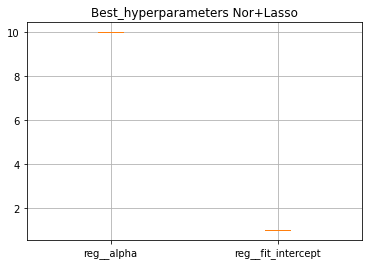

Models = [10.  1.]


In [30]:
from scipy.stats import mode
from datetime import date

r = 0 #hyperparameters model 1
nh = len(best_hyperpar[0][r])
hyperpar_r = np.zeros((Niter,nh))

for i in range(Niter):
  for j in range(nh):
    hyperpar_r[i,j] = best_hyperpar[i][r].get(list(best_hyperpar[i][r].keys())[j])

#Revisar numero entero para realizar casting

aa = list(best_hyperpar[0][r].keys())
c = -1

for i in range(len(aa)):
    if aa[i].find('n_neighbors') > -1:
      c = i

plt.boxplot(hyperpar_r)
plt.xticks(ticks=np.arange(nh)+1,labels=list(best_hyperpar[0][r].keys()))
plt.title('Best_hyperparameters '+label_model[r])
plt.grid()
plt.show()

mode_hyper = mode(hyperpar_r,axis=0)[0][0]
print("Models =", mode_hyper)

# Modelo Definitivo

In [31]:
r = 0 #camino elastic net
steps_final = [('scaler',StandardScaler()),
               ('reg',ElasticNet(alpha=10,fit_intercept=1))]  
         
modelo_final = Pipeline(steps_final)
modelo_final.fit(Xtrain_pre,ytrain)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 ElasticNet(alpha=10, copy_X=True, fit_intercept=1,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

#Caso real evaluación de datos nuevos

In [32]:
ytest_e = modelo_final.predict(car.transform(Xtest)) #simular casos nuevos

In [33]:
print('MAE_test=', msa(ytest,ytest_e))

MAE_test= 3129.71038354768


In [ ]:
pathpre = 'resultados'

try:
  os.mkdir(pathpre)
except:
  print("Carpeta results ya existe")

In [ ]:
import shutil
from joblib import dump, load
from datetime import date, datetime
from google.colab import files

modelo_final = {'modelo':modelo_final,
          'pasos':label_model[1],
          'mae_test':msa(ytest,ytest_e),
            } 

dump(modelo_final,'resultados/modelo_final.joblib')
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__modelo'
shutil.make_archive(namefile, 'zip', 'resultados')
files.download(namefile+'.zip')

#Para evitar desconexión

Presionar Presionar la secuencia Crtl+Shift+i y copiar:

function ClickConnect(){ console.log("Working"); document.querySelector("colab-toolbar-button").click() }setInterval(ClickConnect,60000)